<a href="https://colab.research.google.com/github/A-R-M-028/Predict-the-Revenue-of-Icecream-shop-using-DTR-Decision-Tree-Regressor-and-LR-Linear-Regression-/blob/main/D39_Project_3_Predict_the_Revenue_of_Icecream_shop_using_DTR_(Decision_Tree_Regressor)_and_LR_(Linear_Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Different situation, different dataset, different DECESION*

# Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.tree import DecisionTreeRegressor # Algo1
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression # Algo2
# 2 Algorithm here Ancemble Technique

# Problem Statement

In this data, we have one indepenedent variable 'Temperature' and one depenedent variable 'Revenue'. You have to build a Decision Tree Regressor to study the relationship b/w the two variables of the ICE CREAM shop and then predict the revenue for the ICE CREAM shop based on the temperature on a particular day.

# How it is a regression problem not a classifier problem?
=> Here revenue or target variable in continuous not categorical so this is the reason!

*It can also be solved by only Linear Regression*

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Projects/ML/https:  raw.githubusercontent.com mk-gurucharan Regression master IceCreamData.csv")

In [7]:
# Or
df_live = pd.read_csv("https://raw.githubusercontent.com/mk-gurucharan/Regression/master/IceCreamData.csv")

In [6]:
df.head(10)

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
5,14.352514,367.940744
6,13.707780,308.894518
7,30.833985,696.716640
8,0.976870,55.390338
9,31.669465,737.800824


In [8]:
df_live.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [9]:
df.tail()

,Temperature,Revenue
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304
499,28.957736,655.660388


In [10]:
# There are 500 data points

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [13]:
df.isna().sum().sum()

0

In [14]:
# There is no null value

In [15]:
df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


In [ ]:
# Here o.000 -> Not 0
# So this 0 not null as temp can be 0
# Here automl fails

Text(0.5, 1.0, 'Temparature vs Revenue')

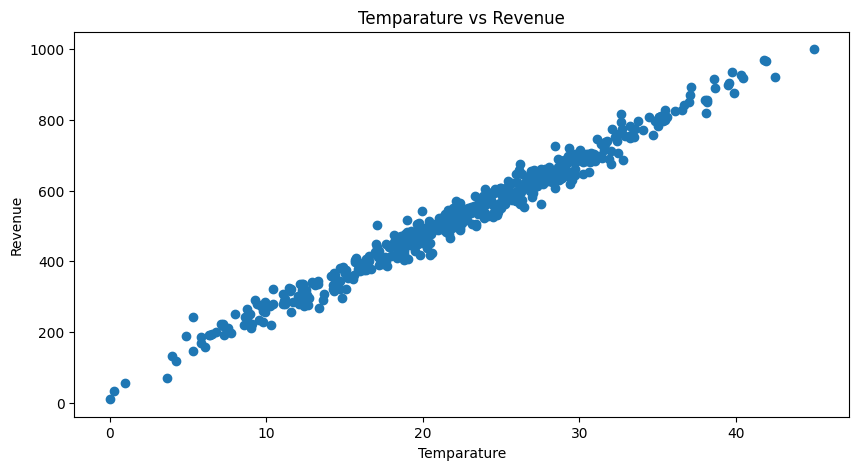

In [27]:
plt.figure(figsize=(10, 5))
plt.scatter(df.Temperature, df.Revenue)
plt.xlabel('Temparature')
plt.ylabel('Revenue')
plt.title('Temparature vs Revenue')

In [ ]:
# This is Positive covariance as data point in same direction

In [28]:
df.corr()

,Temperature,Revenue
Temperature,1.000000,0.989802
Revenue,0.989802,1.000000


In [ ]:
# 0.99 -> High +ve correlaion

<Axes: >

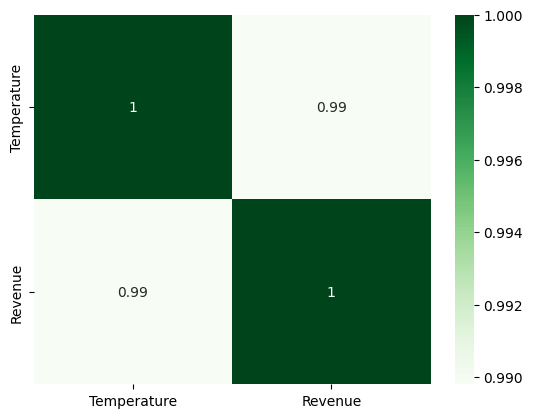

In [31]:
sns.heatmap(df.corr(), cmap = 'Greens', annot = True)

In [ ]:
# Can see High +ve corr between Temp and Revenue

<Axes: >

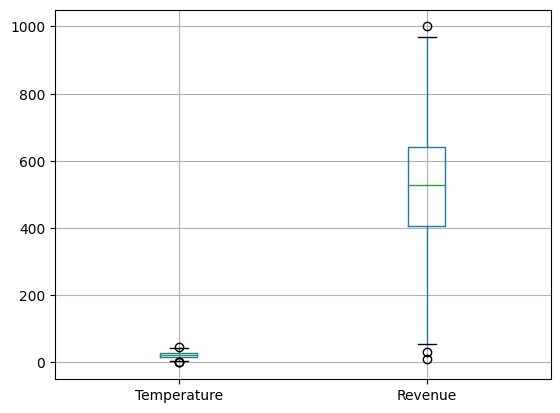

In [32]:
# To find out boxplot
# df.boxplot()

<Axes: >

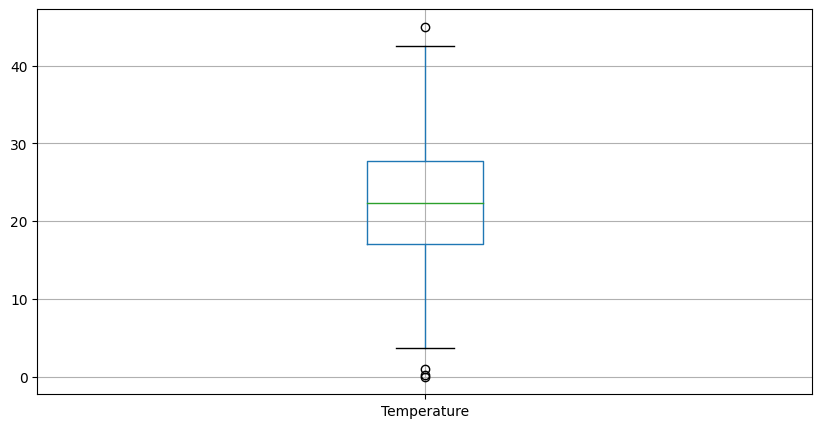

In [40]:
plt.figure(figsize=(10, 5))
df[['Temperature']].boxplot() # Not 2D so typecast it

In [ ]:
# Upper Bound -> aprx 42
# Lower Bound -> aprx 4
# Inside box => 1 -> 1st quantile, 2 -> 2nd quantile, 3rd -> 3rd quantile rest lower and upper bound
# 4 -> 42 are not outliers
# Max value is 45 -> That's why 42 is not an outlier
# But here according to IQR it is outlier

<Axes: >

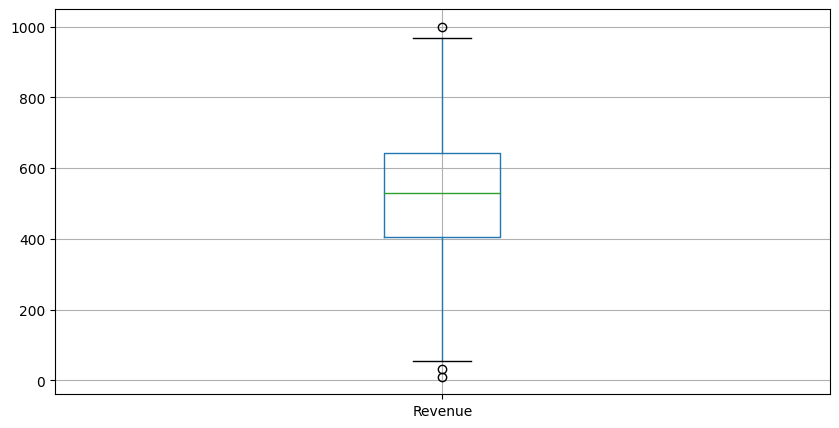

In [41]:
plt.figure(figsize=(10, 5))
df[['Revenue']].boxplot() # Not 2D so typecast it

# ML

# Splitting dataset into 2 half

In [46]:
# If 1D feature in the dataset like here Temperature -> Typecast it to 2D
x = df[['Temperature']] # Or use reshape
# x = df['Temperature'].values.reshape(-1,  1) # Auto change, 1 column
y = df.Revenue


In [47]:
x.ndim

2

In [48]:
y.ndim

1

# Train Test Split

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [50]:
len(x_train)

400

In [51]:
len(x_test)

100

In [52]:
len(y_train)

400

In [53]:
len(y_test)

100

# Model Selection

In [58]:
# Performing 2 algo here
decision =  DecisionTreeRegressor()
linear = LinearRegression()

# Model Training

In [59]:
decision.fit(x_train, y_train)

DecisionTreeRegressor()

In [60]:
linear.fit(x_train, y_train)

LinearRegression()

# Testing Model

In [61]:
linear_y_predict = linear.predict(x_test)

In [63]:
decision_y_predict = decision.predict(x_test)

# Plotting Actual vs Predicted

Text(0.5, 1.0, 'Temparature vs Revenue Linear Regression')

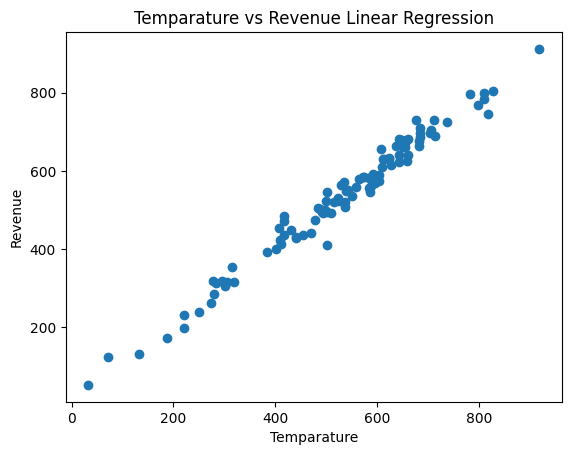

In [67]:
plt.scatter(y_test, linear_y_predict)
plt.xlabel('Temparature')
plt.ylabel('Revenue')
plt.title('Temparature vs Revenue Linear Regression')

Text(0.5, 1.0, 'Temparature vs Revenue Decision Tree Regressor')

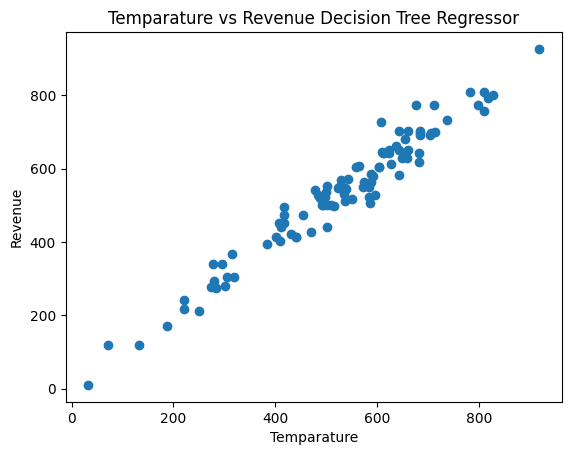

In [66]:
plt.scatter(y_test, decision_y_predict)
plt.xlabel('Temparature')
plt.ylabel('Revenue')
plt.title('Temparature vs Revenue Decision Tree Regressor')

In [69]:
newdf_linear = pd.DataFrame({
    'Actual': y_test,
    'Predicted': linear_y_predict
})

In [70]:
newdf_decision = pd.DataFrame({
    'Actual': y_test,
    'Predicted': decision_y_predict
})

<Axes: >

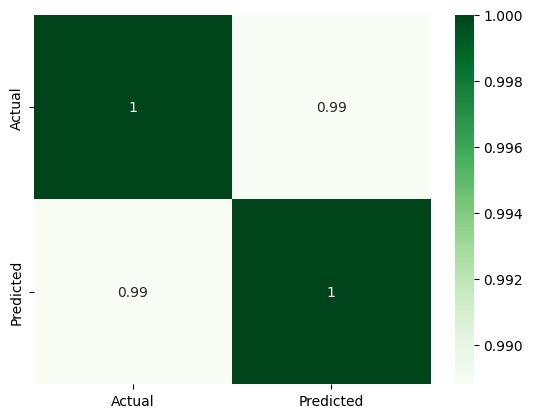

In [72]:
sns.heatmap(newdf_linear.corr(), cmap = 'Greens', annot = True)

<Axes: >

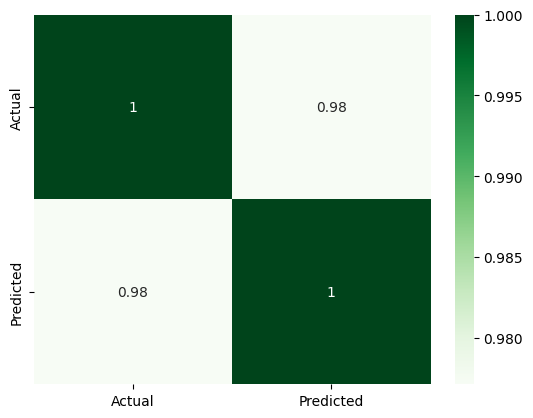

In [74]:
sns.heatmap(newdf_decision.corr(), cmap = 'Greens', annot = True)

In [ ]:
# Relation of decision is slightly less but i can't say that leniar has better accuracy
# This is correlation

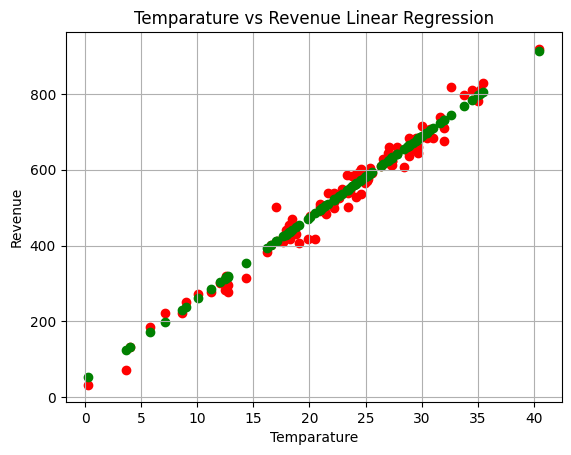

In [75]:
plt.scatter(x_test, y_test, c = 'r')
plt.scatter(x_test,linear_y_predict, c = 'green')
plt.xlabel('Temparature')
plt.ylabel('Revenue')
plt.title('Temparature vs Revenue Linear Regression')
plt.grid()

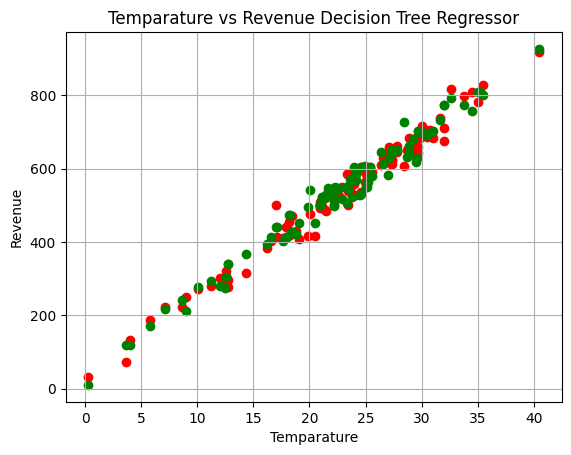

In [76]:
plt.scatter(x_test, y_test, c = 'r')
plt.scatter(x_test, decision_y_predict, c = 'green')
plt.xlabel('Temparature')
plt.ylabel('Revenue')
plt.title('Temparature vs Revenue Decision Tree Regressor')
plt.grid()

# Checking the Performance

In [77]:
# Linear Regression Accuracy
f'Linear Regression Accuracy: {r2_score(y_test, linear_y_predict)}'

'Linear Regression Accuracy: 0.9771532792713993'

In [78]:
# Decision Tree Regressor Accuracy
f'Decision Tree Regressor Accuracy: {r2_score(y_test, decision_y_predict)}'

'Decision Tree Regressor Accuracy: 0.9534772958686918'

Accuracy

In [ ]:
# Linear Regression Accuracy: 97%
# Decision Tree Regressor Accuracy: 95%

# Conclusion
I definately go with Linear Regression technique as it is quite high accuracy than Decision Tree Algorithm!

In [84]:
# Check price based on temp now
linear.predict([[35.1]])[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


797.3119235982801

In [83]:
# Check price based on temp now
decision.predict([[35.1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([807.5412872])

In [ ]:
# More powerful Random Forest, than Decision Tree -> This dataset can give 97% aprox

In [ ]:
# Use Automl for model selection -> Use